In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('mlops_data.csv')

In [3]:
df.describe()

,gender,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
count,4746.000000,4746.000000,4746.000000,4746.000000,4.746000e+03,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,0.737042,2.082807,1.484197,1.646228,2.009942e+13,2.015489e+13,2029.969448,2036.607880,183.162663,689.451960,43.479140,0.438896,0.439949,74.372946,74.368310,49.947745,96.081753,1521.886641,1.000000,867.148546
std,0.585355,0.964978,1.099795,1.079263,3.516337e+10,1.748104e+10,7793.300833,1336.119914,374.034481,3355.302483,297.395507,5.327440,17.832244,246.407233,560.782479,215.554281,545.025818,6099.009235,0.325763,325.933076
min,0.000000,1.000000,0.000000,0.000000,2.002011e+13,2.012010e+13,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.411985,297.000000
25%,0.000000,1.000000,1.000000,1.000000,2.007042e+13,2.014070e+13,95.000000,835.250000,24.000000,29.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,61.000000,0.831954,664.000000
50%,1.000000,3.000000,1.000000,2.000000,2.009121e+13,2.016072e+13,218.000000,2035.500000,53.000000,68.000000,4.000000,0.000000,0.000000,14.000000,1.000000,4.000000,5.000000,151.000000,0.997535,917.000000
75%,1.000000,3.000000,2.000000,3.000000,2.013040e+13,2.017073e+13,757.750000,3146.500000,154.000000,219.750000,14.000000,0.000000,0.000000,46.000000,8.000000,19.000000,22.000000,563.750000,1.057149,994.000000
max,2.000000,3.000000,3.000000,3.000000,2.017093e+13,2.017100e+13,153193.000000,5349.000000,3843.000000,94142.000000,13394.000000,185.000000,949.000000,6041.000000,24392.000000,4788.000000,12350.000000,115547.000000,1.865008,1596.000000


In [4]:
df.head()

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,male,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0,unknown,3,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1,male,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,male,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0,unknown,3,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994


## Pending
- Ensure gender c_api and c_man are the same for every record    Check
- Separate the unknowns
- Select features
- Nulls    Check
- Normalize
- 

In [5]:
missing_values = df.isnull().sum()

# Print missing values
print("Missing values per column:")
print(missing_values)

Missing values per column:
gender           0
C_api            0
C_man            0
E_NEds           0
E_Bpag           0
firstDay         0
lastDay          0
NEds             0
NDays            0
NActDays         0
NPages           0
NPcreated        0
pagesWomen       0
wikiprojWomen    0
ns_user          0
ns_wikipedia     0
ns_talk          0
ns_userTalk      0
ns_content       0
weightIJ         0
NIJ              0
dtype: int64


In [6]:
# Map labels for comparison
gender_map = {"male": 1, "female": 2, "unknown": 0}
C_api_map = {"female": 2, "male": 1, "unknown": 0}
C_man_map = {1: 1, 2: 2, 3: 0}

# Convert labels for consistency
# df['gender'] = df['gender'].replace(gender_map)
df['C_api'] = df['C_api'].replace(C_api_map)
df['C_man'] = df['C_man'].replace(C_man_map)

df.head()


,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,1,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0,0,0,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1,1,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,1,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0,0,0,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994


In [7]:
# Check for inconsistencies between gender labels
inconsistencies = df[ (df['gender'] != df['C_api']) | (df['gender'] != df['C_man']) | (df['C_api'] != df['C_man']) ]
inconsistencies = inconsistencies[['gender', 'C_api', 'C_man']]

# Print number of inconsistencies
if inconsistencies.empty:
  print("No inconsistencies found between gender labels.")
else:
  print(f"Found {len(inconsistencies)} records with inconsistencies between gender labels.")
  print(inconsistencies)  # This will print all rows with inconsistencies

Found 2124 records with inconsistencies between gender labels.
      gender  C_api  C_man
5          1      1      0
7          1      0      1
8          1      0      1
9          1      1      0
11         1      1      0
...      ...    ...    ...
4740       1      1      0
4741       1      1      0
4743       2      0      2
4744       2      2      0
4745       1      0      1

[2124 rows x 3 columns]


In [8]:
# Check for true inconsistencies between C_man and C_api. Where one says male and the other female
true_inconsistencies = df[ ( (df['C_man'] == 1) & (df['C_api'] == 2) ) | ( (df['C_man'] == 2) & (df['C_api'] == 1) ) ]

# Print number of specific inconsistencies
if true_inconsistencies.empty:
  print("No specific inconsistencies found between C_man and C_api.")
else:
  print(f"Found {len(true_inconsistencies)} records with specific inconsistencies between C_man and C_api.")
  print(true_inconsistencies)  # This will print all rows with specific inconsistencies


No specific inconsistencies found between C_man and C_api.


In [9]:
# Check if there's any discrepancy in gender and the other two gender-wise columns
true_inconsistencies = df[ ( (df['gender'] == 1) & (df['C_api'] == 0) & (df['C_man'] == 0) ) |
( (df['gender'] == 2) & (df['C_man'] == 0) & (df['C_api'] == 0) ) ]

# Print number of specific inconsistencies
if true_inconsistencies.empty:
  print("No specific inconsistencies found between C_man and C_api.")
else:
  print(f"Found {len(true_inconsistencies)} records with specific inconsistencies between C_man and C_api.")
  print(true_inconsistencies)  # This will print all rows with specific inconsistencies

No specific inconsistencies found between C_man and C_api.


In [10]:
# Define column name (replace 'column_name' with the actual column name)
column_name = 'gender'

# Separate dataframes for each value
df_0 = df[df[column_name] == 0]
df_1 = df[df[column_name] == 1]
df_2 = df[df[column_name] == 2]

# Print information about each dataframe
print(f"Unknowns: {len(df_0)}")
print(f"Males: {len(df_1)}")
print(f"Females: {len(df_2)}")


Unknowns: 1601
Males: 2792
Females: 353


In [11]:
df = df[df['gender'] != 0]
df.head()

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,1,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
2,1,1,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,1,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
5,1,1,0,3,1,20060526141942,20170914131932,1887,4130,197,...,62,0,0,7,2,31,10,1660,0.661673,477
7,1,0,1,3,3,20081105224814,20170818012959,5833,3209,566,...,108,0,0,161,10,9,184,4744,1.481654,1596


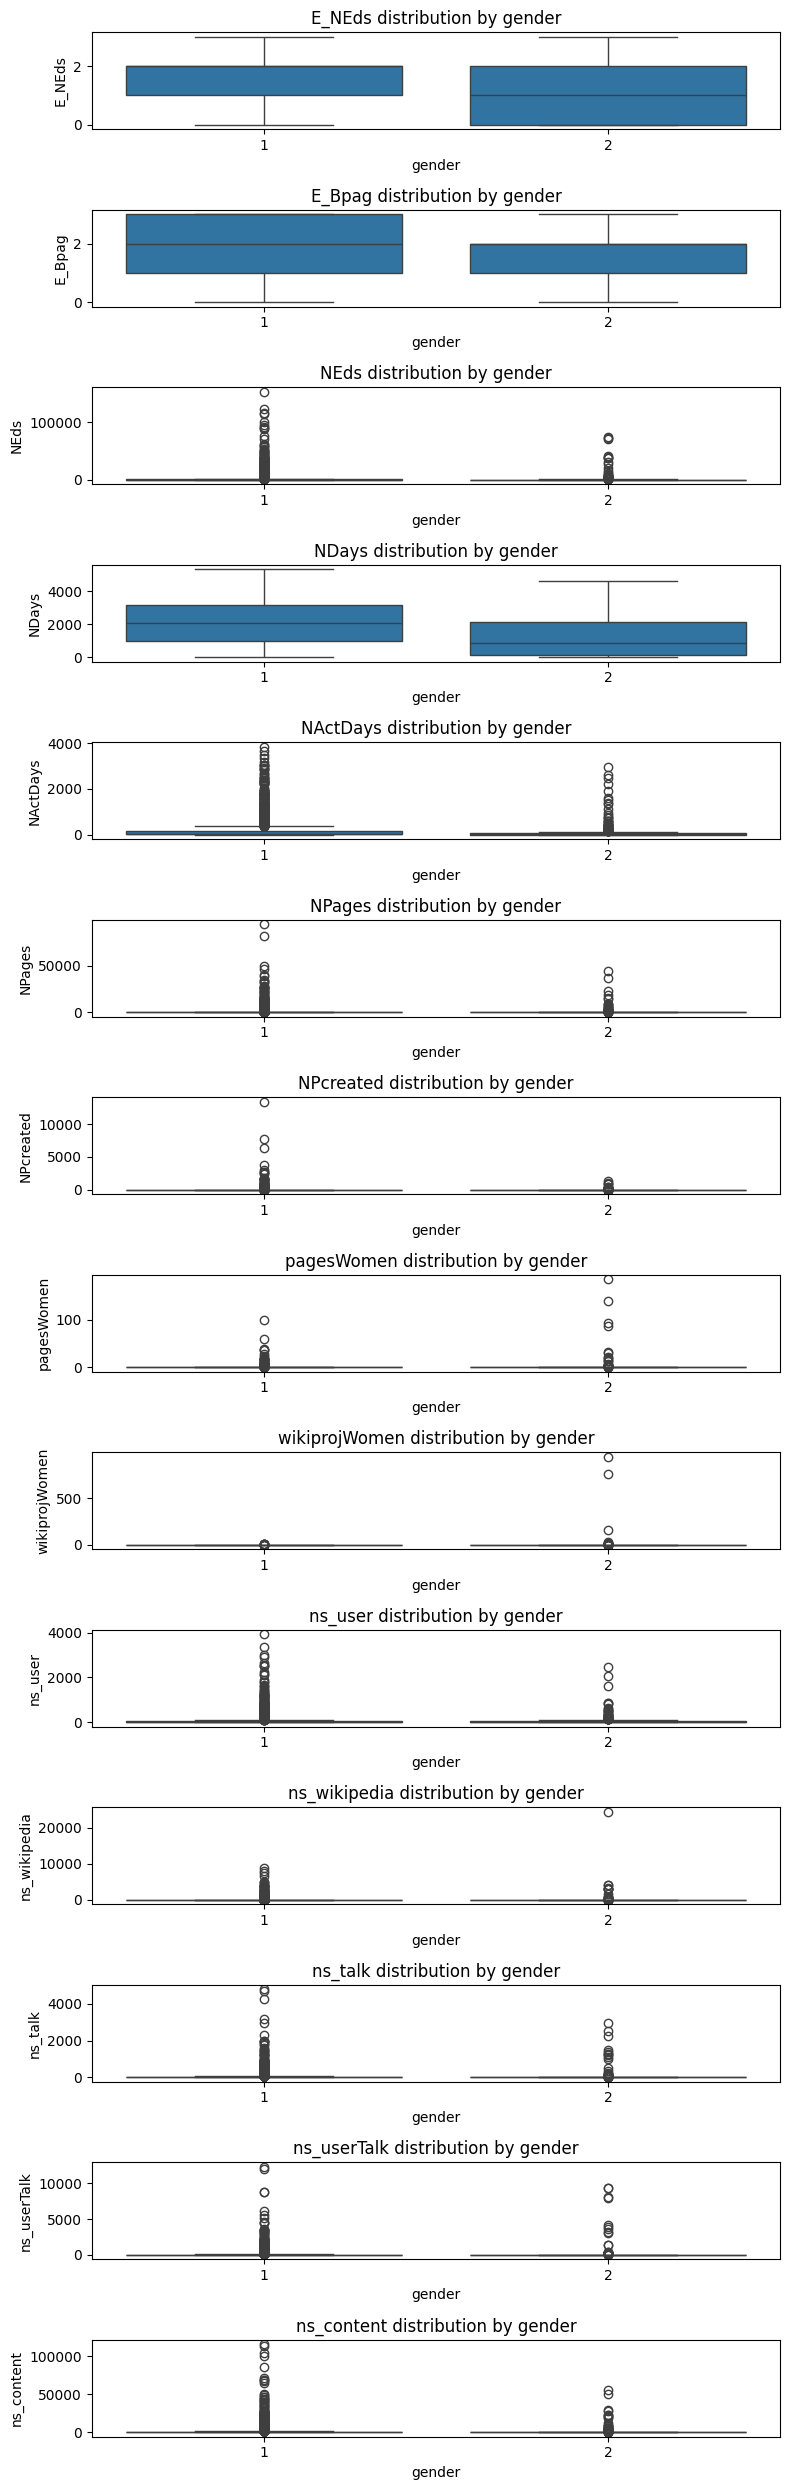

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric features for the box plots
numeric_features = ['E_NEds', 'E_Bpag',
       'NEds', 'NDays', 'NActDays', 'NPages', 'NPcreated', 'pagesWomen',
       'wikiprojWomen', 'ns_user', 'ns_wikipedia', 'ns_talk', 'ns_userTalk',
       'ns_content']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(8, 25))

# Iterate through each numeric feature and create a box plot
for i, feature in enumerate(numeric_features):
    sns.boxplot(x='gender', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} distribution by gender')

plt.tight_layout()
plt.show()





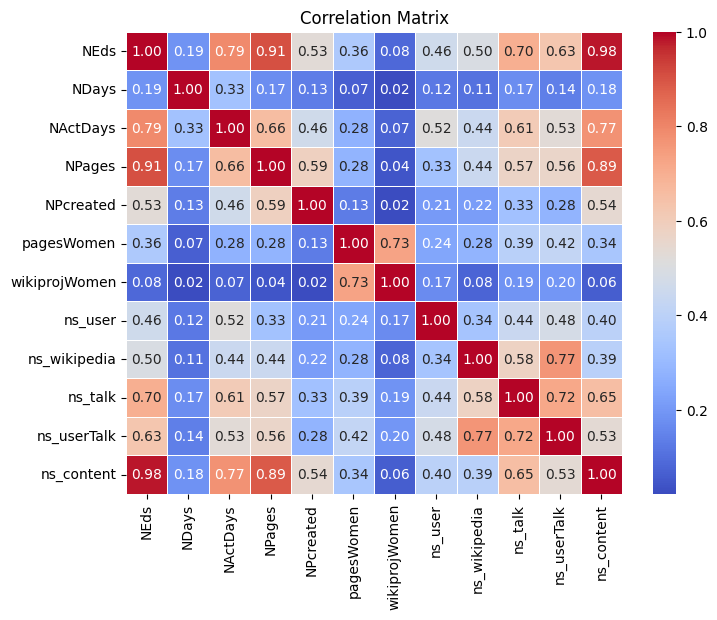

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation matrix
selected_columns = [
       'NEds', 'NDays', 'NActDays', 'NPages', 'NPcreated', 'pagesWomen',
       'wikiprojWomen', 'ns_user', 'ns_wikipedia', 'ns_talk', 'ns_userTalk',
       'ns_content']
# Create a subset DataFrame with selected columns
subset_df = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
